In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Traffic-Prediction-using-Machine-Learning.csv',encoding='latin-1') 

In [3]:
df.dropna(inplace=True)

In [4]:
day_mapping = {
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
    'Friday': 5, 'Saturday': 6, 'Sunday': 7
}
df['CodedDay'] = df['Day'].map(day_mapping)

In [5]:
df['ZoneCode'] = df['Zone'].astype('category').cat.codes


In [6]:
features = ['Weather', 'Temperature', 'CodedDay', 'ZoneCode']
X = df[features]

In [7]:
y = df['Traffic']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 2.21


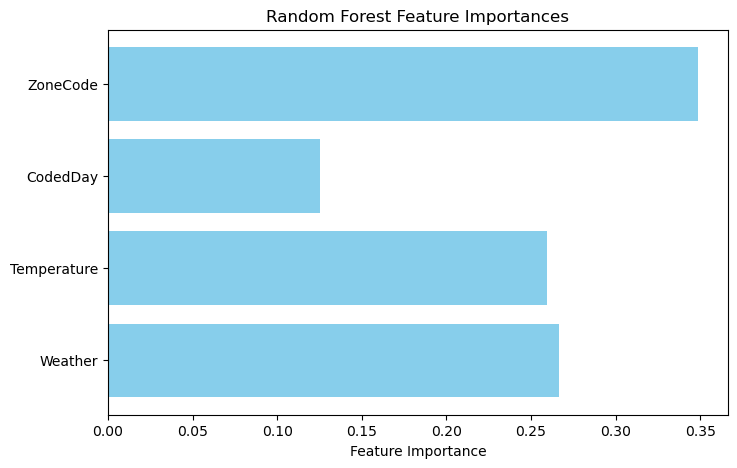

In [11]:
importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()

In [12]:
day_mapping = {
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
    'Friday': 5, 'Saturday': 6, 'Sunday': 7
}
df['CodedDay'] = df['Day'].map(day_mapping)

In [13]:
df['ZoneCode'] = df['Zone'].astype('category').cat.codes

In [14]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)

In [15]:
y_test_safe = np.where(y_test == 0, 1e-6, y_test)

In [16]:
error_rate = (y_pred - y_test) / y_test_safe * 100

In [17]:
abs_error_rate = np.abs(error_rate)

In [18]:
mean_error = np.mean(abs_error_rate)
print(f"Mean Error Rate: {mean_error:.2f}%")

Mean Error Rate: 63.11%


In [19]:
error_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Error (%)': error_rate
})
print(error_df.head())

   Actual  Predicted   Error (%)
0       2       2.82   41.000000
1       2       3.46   73.000000
2       5       2.82  -43.600000
3       1       2.47  147.000000
4       3       3.41   13.666667


In [20]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)

In [21]:
y_test_safe = np.where(y_test == 0, 1e-6, y_test)

In [22]:
error_rate = (y_pred - y_test) / y_test_safe * 100
abs_error_rate = np.abs(error_rate)

In [23]:
mean_error = np.mean(abs_error_rate)

In [24]:
print(f"Mean Error Rate: {mean_error:.2f}%")

Mean Error Rate: 63.11%


In [25]:
if mean_error <= 10:
    print("✅ Excellent performance: Very low average error.")
elif mean_error <= 15:
    print("✅ Good performance: Predicted traffic differs from actual by ~{:.2f}% on average.".format(mean_error))
    print("There is still some room for improvement.")
else:
    print("⚠️ Model performance may need improvement. Error rate is relatively high.")

⚠️ Model performance may need improvement. Error rate is relatively high.


In [26]:
error_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Error (%)': error_rate.round(2)
})
print("\nSample Error Analysis:")
print(error_df.head())


Sample Error Analysis:
   Actual  Predicted  Error (%)
0       2       2.82      41.00
1       2       3.46      73.00
2       5       2.82     -43.60
3       1       2.47     147.00
4       3       3.41      13.67


In [27]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [28]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [29]:
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')

In [30]:
mse_scores = -cv_scores
rmse_scores = np.sqrt(mse_scores)

In [31]:
print(f"Cross-Validation MSE scores: {mse_scores}")
print(f"Cross-Validation RMSE scores: {rmse_scores}")
print(f"Average RMSE: {rmse_scores.mean():.2f}")

Cross-Validation MSE scores: [2.22978819 2.09942743 2.19002917 2.26305938 2.30547387]
Cross-Validation RMSE scores: [1.49324753 1.44894011 1.47987471 1.50434683 1.5183787 ]
Average RMSE: 1.49


In [32]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [38]:
print(f"Linear Regression MSE: {mse_lr:.2f}")
print(f"Linear Regression R² Score: {r2_lr:.2f}")

Linear Regression MSE: 2.13
Linear Regression R² Score: -0.00


In [39]:
if r2_lr < 0.7:
    print("⚠️ The linear model may not capture non-linear or complex traffic behavior.")

⚠️ The linear model may not capture non-linear or complex traffic behavior.


In [40]:
df['HiddenEventImpact'] = np.random.normal(0, 5, size=len(df))

In [41]:
X_limited = df[['Weather', 'Temperature', 'CodedDay', 'ZoneCode']]  # excluding 'HiddenEventImpact'
y = df['Traffic']

In [42]:
print("⚠️ Model does not include real-time event data (e.g., accidents, roadblocks), which may limit accuracy.")

⚠️ Model does not include real-time event data (e.g., accidents, roadblocks), which may limit accuracy.


In [43]:
df = pd.read_csv('Traffic-Prediction-using-Machine-Learning.csv')  # Replace with your actual file path
df.dropna(inplace=True)

In [44]:
day_mapping = {
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
    'Friday': 5, 'Saturday': 6, 'Sunday': 7
}
df['CodedDay'] = df['Day'].map(day_mapping)
df['ZoneCode'] = df['Zone'].astype('category').cat.codes

In [45]:
df['Traffic_Lag1'] = df['Traffic'].shift(1)
df.dropna(inplace=True) 

In [46]:
features = ['Weather', 'Temperature', 'CodedDay', 'ZoneCode', 'Traffic_Lag1']
X = df[features]
y = df['Traffic']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

gbr = GradientBoostingRegressor(random_state=42)

In [49]:
tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=tscv, n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=GradientBoostingRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [50]:
best_model = grid_search.best_estimator_
print("✅ Best Parameters:", grid_search.best_params_)

✅ Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


In [51]:
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

RMSE: 1.42


In [52]:
error_rate = np.mean(np.abs((y_pred - y_test) / y_test) * 100)
print(f"Mean Error Rate: {error_rate:.2f}%")

Mean Error Rate: 56.14%
